<a href="https://colab.research.google.com/github/Razzf/NeuralNetworkFromScratch/blob/master/NNFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

In [131]:
# importing the data
n = 500
p = 2

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.07)
Y = Y[:, np.newaxis]

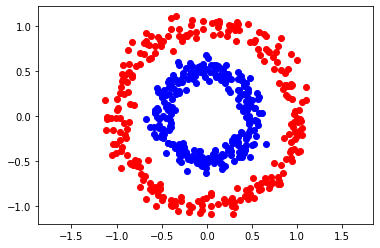

In [132]:
# Dots and their classes represented by colors
plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c='red')
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c='blue')
plt.axis('equal')
plt.show()

In [133]:
class Funky():
  def __init__(self, function, vars):
    self.func = sp.utilities.lambdify(vars, function)
    derivative = sp.diff(function, vars)
    self.prime = sp.utilities.lambdify(vars, derivative)

In [134]:
mse = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
       lambda Yp, Yr: (Yp - Yr))

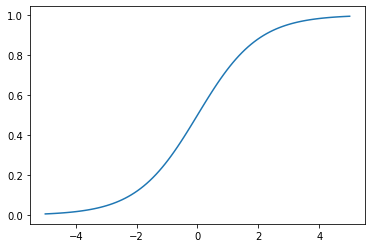

In [135]:
# Activation Functions and their derivatives
x =  sp.Symbol('x')
sig = Funky(1 / (1 + np.e ** (-x)), x)
sigmoid = (lambda x: 1 / (1 + np.e ** (-x)),
           sig.prime)

relu = lambda x: np.maximum(0, x)

_x = np.linspace(-5, 5, 100)
plt.plot(_x, sigmoid[0](_x))
plt.show()


In [136]:
#layer clase
class Dense():
  def __init__(self, n_inputs, n_neurons, activation):

    self.act = activation
    self.biases = np.random.rand(1, n_neurons) * 2 - 1
    self.weights = np.random.rand(n_inputs, n_neurons) * 2 -1

In [137]:
class NeuralNetwork():

  def __init__(self, layers=[]):
    
    self.out = []
    self.layers = layers
  
  def add(self, ly):
    if ly is Dense:
      self.layers.append(ly)
    else:
      raise Exception('no valid layer')
  
  def forward(self, x, returnY=True):
    if len(self.layers) > 1:
      self.out = [(None, x)]
      for i, layer in enumerate(self.layers):
        z = self.out[-1][1] @ self.layers[i].weights + self.layers[i].biases
        a = self.layers[i].act[0](z)
        self.out.append((z, a))
      if returnY:
        return self.out[-1][1]
    else:
      raise Exception("There are no layers")
  
  def backward(self, y, loss, lr):

    deltas = []

    for i in reversed(range(0, len(self.layers))):
      
      z = self.out[i + 1][0]
      a = self.out[i + 1][1]

      if i == len(self.layers) - 1:
        deltas.insert(0, loss[1](a, Y) * self.layers[i].act[1](z))
      else:
        deltas.insert(0, deltas[0] @ _w.T * self.layers[i].act[1](z))
      
      _w = self.layers[i].weights

      #print(self.layers[i].weights.shape, self.out[i][1].T.shape)
      self.layers[i].biases = self.layers[i].biases - np.mean(deltas[0], axis= 0, keepdims=True) * lr
      self.layers[i].weights = self.layers[i].weights - self.out[i][1].T @ deltas[0] * lr

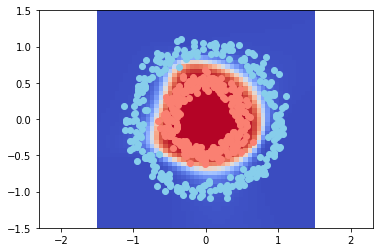

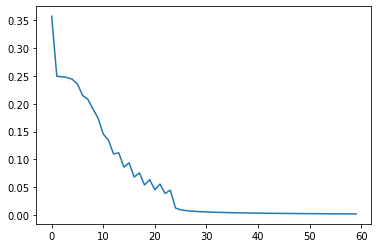

In [138]:
import time
from IPython.display import clear_output

neural_net = NeuralNetwork([
  Dense(p, 4, sigmoid),
  Dense(4, 8, sigmoid),
  Dense(8, 1, sigmoid)
])

loss = []

for i in range(1500):

  neural_net.forward(X, returnY=False)
  neural_net.backward(Y, mse, lr=0.04) # prediction y
  py = neural_net.forward(X)

  if i % 25 == 0:

    loss.append(mse[0](py, Y))

    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _y[i0, i1] = neural_net.forward(np.array([[x0, x1]]))[0][0]
    
    
    
    plt.pcolormesh(_x0, _x1, _y, cmap='coolwarm')
    plt.axis('equal')

    plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c='skyblue')
    plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c='salmon')

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(.25)
  